# Tutorial 9: Portfolio Optimization with Risk Factors and Principal Components Regression (PCR)

### Principal Components Regression (PCR)

Principal Components Regression (PCR)은 주성분 분석(PCA)과 회귀 분석(Regression)을 결합한 방법으로, 다중 공선성(multicollinearity)을 해결하고 예측 성능을 향상시키기 위해 사용됩니다. PCR은 데이터의 차원을 축소하고, 주요 성분(Principal Components)을 사용하여 회귀 모델을 구축합니다.

#### 주요 단계

1. **주성분 분석(PCA)**:
   - **목적**: 데이터의 분산을 최대한 보존하면서, 상관관계가 있는 변수들을 독립적인 주성분으로 변환하여 차원을 축소합니다.
   - **과정**:
     1. **데이터 표준화**: 각 변수의 평균을 0으로, 분산을 1로 맞추어 표준화합니다.
     2. **공분산 행렬 계산**: 표준화된 데이터의 공분산 행렬을 계산합니다.
     3. **고유값 분해**: 공분산 행렬을 고유값과 고유벡터로 분해합니다.
     4. **주성분 선택**: 가장 큰 고유값에 대응하는 고유벡터를 선택하여 주요 성분을 형성합니다.

2. **주성분 회귀(PCR)**:
   - **목적**: 선택된 주요 성분을 독립 변수로 사용하여 회귀 모델을 구축합니다.
   - **과정**:
     1. **주성분 투영**: 원래 데이터를 주요 성분 공간으로 투영합니다.
     2. **회귀 모델 적합**: 주요 성분을 사용하여 종속 변수에 대한 회귀 모델을 적합합니다.

#### PCR의 장점

- **다중 공선성 문제 해결**: 원래 데이터의 상관관계가 높은 변수들을 독립적인 주성분으로 변환하여 다중 공선성 문제를 해결합니다.
- **차원 축소**: 데이터의 차원을 축소하여 모델의 복잡성을 줄이고 과적합을 방지합니다.
- **해석 가능성**: 주요 성분이 데이터의 분산을 최대한 설명하므로, 모델의 주요 특성을 이해하는 데 도움이 됩니다.

#### PCR의 단점

- **정보 손실**: 주성분 분석 과정에서 일부 정보가 손실될 수 있습니다. 특히, 선택된 주성분이 전체 변동성을 충분히 설명하지 못하는 경우.
- **해석의 어려움**: 주성분은 원래 변수의 선형 결합으로 구성되므로, 각 주성분의 의미를 해석하기 어려울 수 있습니다.

#### PCR의 예시

1. **데이터 생성**:
   ```python
   import numpy as np
   import pandas as pd
   from sklearn.decomposition import PCA
   from sklearn.linear_model import LinearRegression
   from sklearn.model_selection import train_test_split

   # 예제 데이터 생성
   np.random.seed(0)
   X = np.random.rand(100, 10)  # 독립 변수 10개
   y = X @ np.random.rand(10) + np.random.randn(100)  # 종속 변수
   ```

2. **주성분 분석(PCA)**:
   ```python
   pca = PCA(n_components=5)  # 5개의 주성분 선택
   X_pca = pca.fit_transform(X)
   ```

3. **회귀 모델 적합**:
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)
   model = LinearRegression()
   model.fit(X_train, y_train)
   ```

4. **모델 평가**:
   ```python
   y_pred = model.predict(X_test)
   from sklearn.metrics import mean_squared_error
   mse = mean_squared_error(y_test, y_pred)
   print(f'Mean Squared Error: {mse}')
   ```

### 요약

Principal Components Regression (PCR)은 주성분 분석(PCA)과 회귀 분석을 결합하여 다중 공선성 문제를 해결하고 예측 성능을 향상시키는 방법입니다. PCR은 데이터의 차원을 축소하고 주요 성분을 사용하여 회귀 모델을 구축합니다. 이 방법은 차원 축소와 다중 공선성 해결에 유용하지만, 일부 정보 손실과 해석의 어려움이 있을 수 있습니다.

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%%**********************]  30 of 30 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna() # 독립 변수 데이터 프레임
Y = data[assets].pct_change().dropna() # 종속 변수 데이터 프레임

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6780%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9549%,-1.1376%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1479%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios with PCR

### 2.1 Estimating the loadings matrix with PCR.

In [3]:
import riskfolio as rp

feature_selection = 'PCR' # 최적 모델을 선택하는 방법으로 주성분 회귀(PCR)를 설정합니다. 'PCR' 또는 'Stepwise' 중 선택할 수 있습니다.
n_components = 0.95 # 95% of explained variance. See PCA in scikit learn for more information

loadings = rp.loadings_matrix(X=X, Y=Y, feature_selection=feature_selection, # 주어진 데이터 X와 Y를 사용하여 로딩 행렬을 계산합니다.
                              n_components=n_components)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6174,0.3847,1.0857,-1.1434,1.4537
BA,0.0005,0.2236,0.3103,0.2055,-0.0523,0.4583
BAX,0.0003,0.3086,0.1875,0.0764,0.5222,-0.0462
BMY,-0.0003,0.0716,0.1550,0.2640,0.3029,0.1028
CMCSA,0.0001,0.0825,0.1750,0.2755,0.2802,0.1424
CNP,0.0001,-0.2225,-0.0563,0.5690,1.1192,-0.4869
CPB,-0.0003,-0.2158,-0.0891,0.5280,1.1880,-0.5770
DE,0.0005,0.0756,0.3323,0.3341,-0.3697,0.7041
HPQ,0.0002,0.1799,0.3985,0.2753,-0.4646,0.8125
JCI,0.0000,-0.0535,0.2147,0.4089,-0.0640,0.4251


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [5]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov)

feature_selection = 'PCR' # Method to select best model, could be PCR or Stepwise
n_components = 0.95 # 95% of explained variance. See PCA in scikit learn for more information

port.factors = X
port.factors_stats(method_mu=method_mu,
                   method_cov=method_cov,
                   feature_selection=feature_selection,
                   n_components=n_components,
                  )

# Estimate optimal portfolio:

model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.2498%,11.0551%,0.0000%,0.0000%,10.4526%,0.0000%,4.5015%,0.0000%,0.0000%,...,10.9345%,0.0000%,0.0000%,0.0000%,0.0000%,5.0770%,0.8007%,0.0000%,5.7562%,0.0000%


### 2.3 Plotting portfolio composition

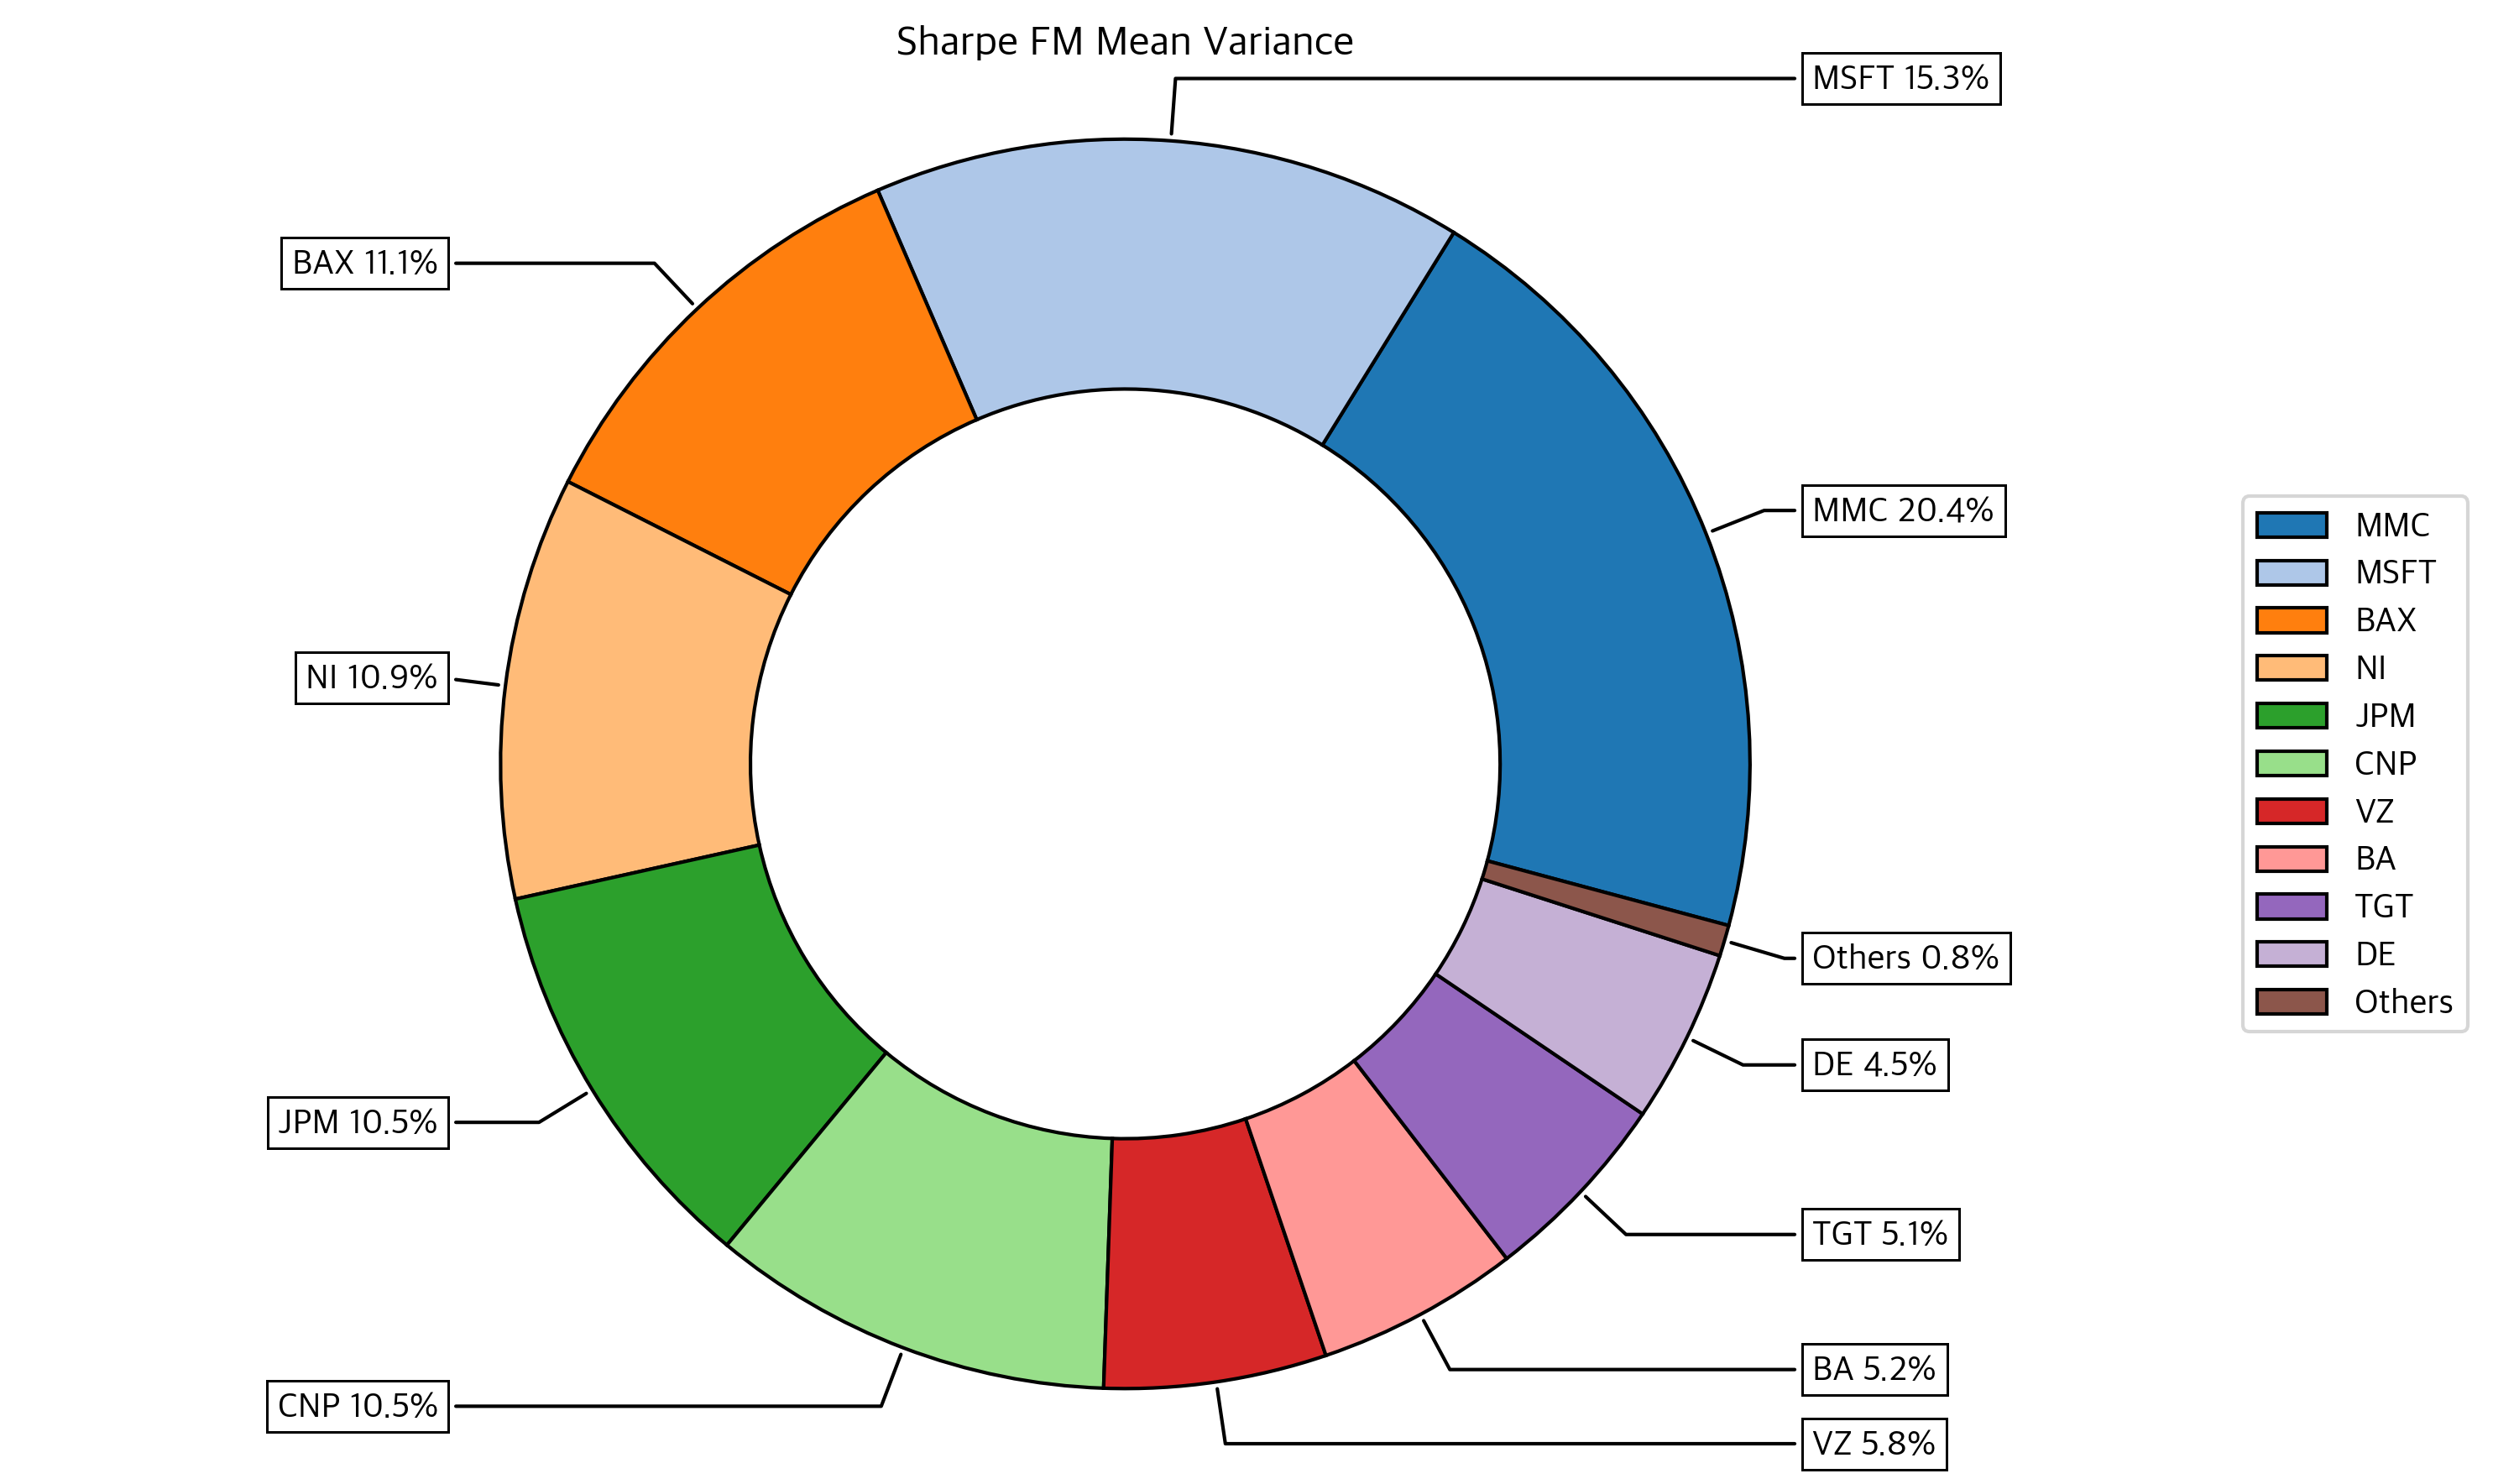

In [6]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.4 Calculate efficient frontier

In [7]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.7625%,2.8314%,3.0976%,9.6893%,5.7295%,0.0000%,0.0000%,2.9362%,...,12.5891%,0.0000%,12.4000%,1.1687%,10.6156%,3.1996%,0.0000%,0.0000%,12.5814%,2.2333%
1,0.0000%,0.4136%,5.2908%,0.0000%,2.9053%,11.5654%,3.7706%,0.9451%,0.0000%,1.1462%,...,14.1671%,0.0000%,6.8155%,0.0000%,8.9542%,4.1886%,0.0000%,0.0000%,12.6604%,2.1756%
2,0.0000%,1.3810%,6.8442%,0.0000%,2.5560%,12.2104%,2.8637%,1.6897%,0.0000%,0.1263%,...,14.7357%,0.0000%,4.2744%,0.0000%,8.0141%,4.5027%,0.0000%,0.0000%,12.5148%,1.8258%
3,0.0000%,1.9101%,7.6411%,0.0000%,2.0734%,12.5670%,2.1089%,2.0795%,0.0000%,0.0000%,...,15.0143%,0.0000%,2.1619%,0.0000%,7.1453%,4.6662%,0.0000%,0.0000%,12.2582%,1.4427%
4,0.0000%,2.3872%,8.3345%,0.0000%,1.5725%,12.8056%,1.3521%,2.4264%,0.0000%,0.0000%,...,15.1586%,0.0000%,0.0716%,0.0000%,6.2561%,4.7999%,0.0000%,0.0000%,11.9231%,1.0605%


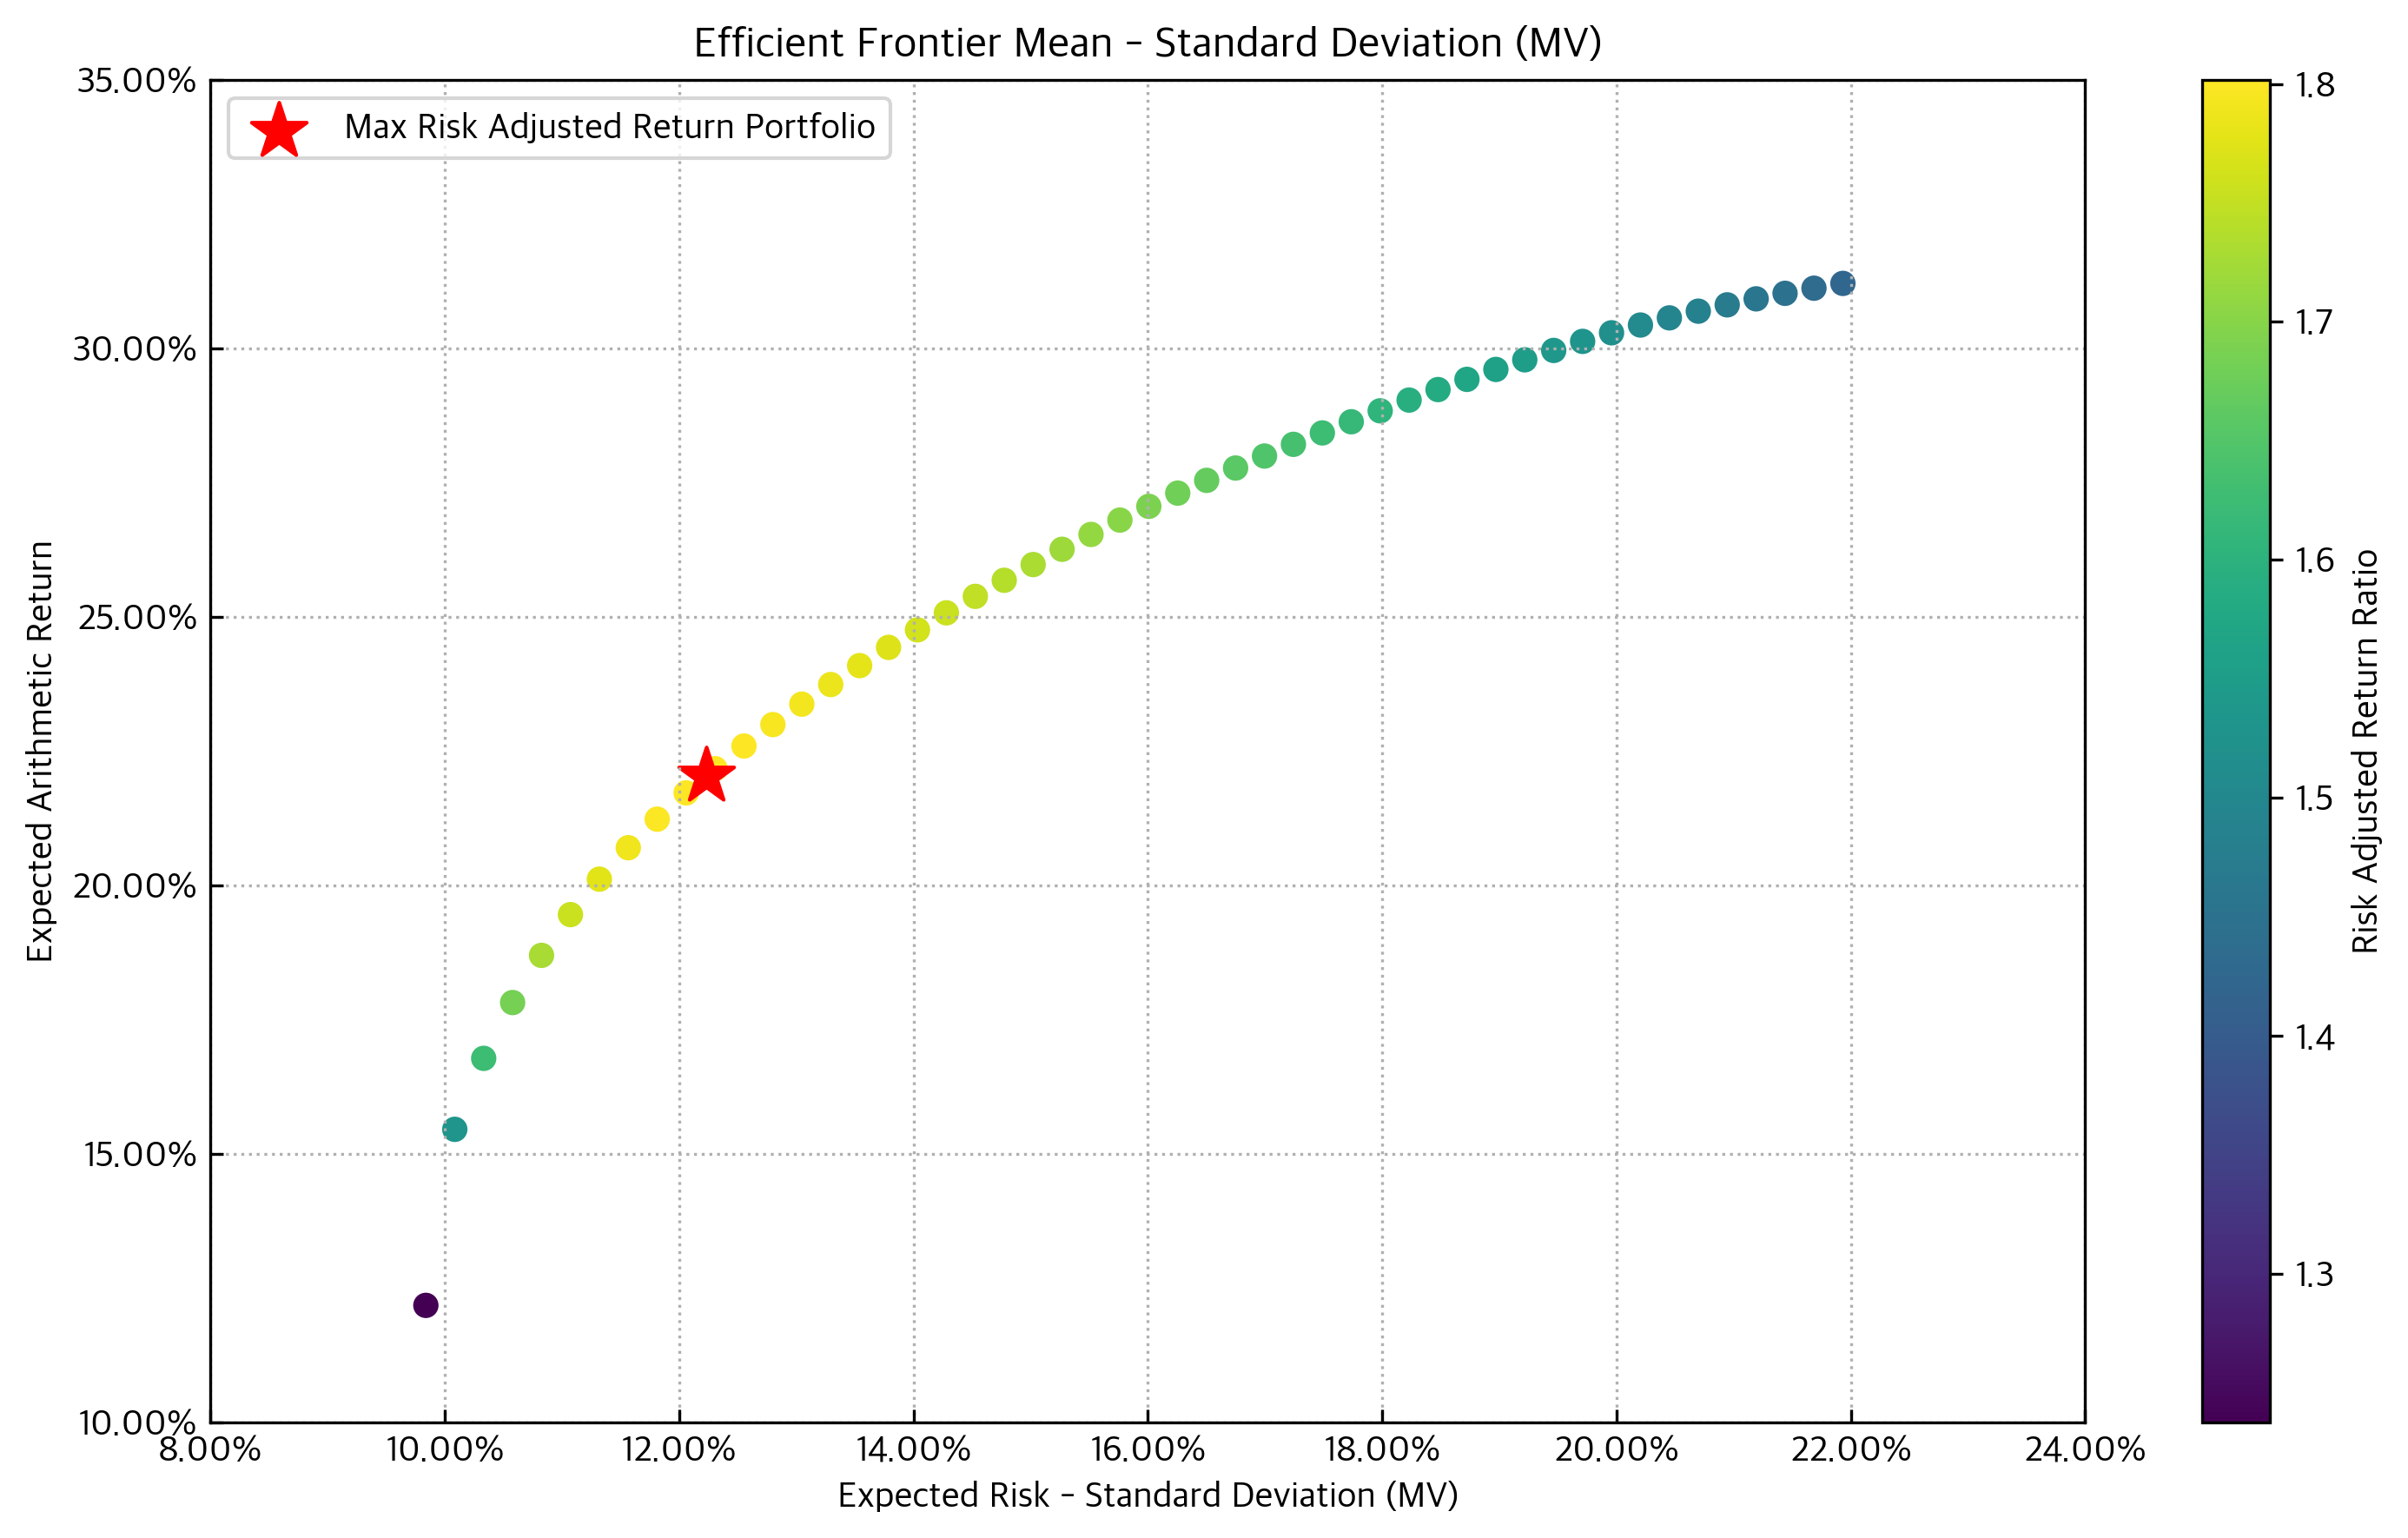

In [8]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

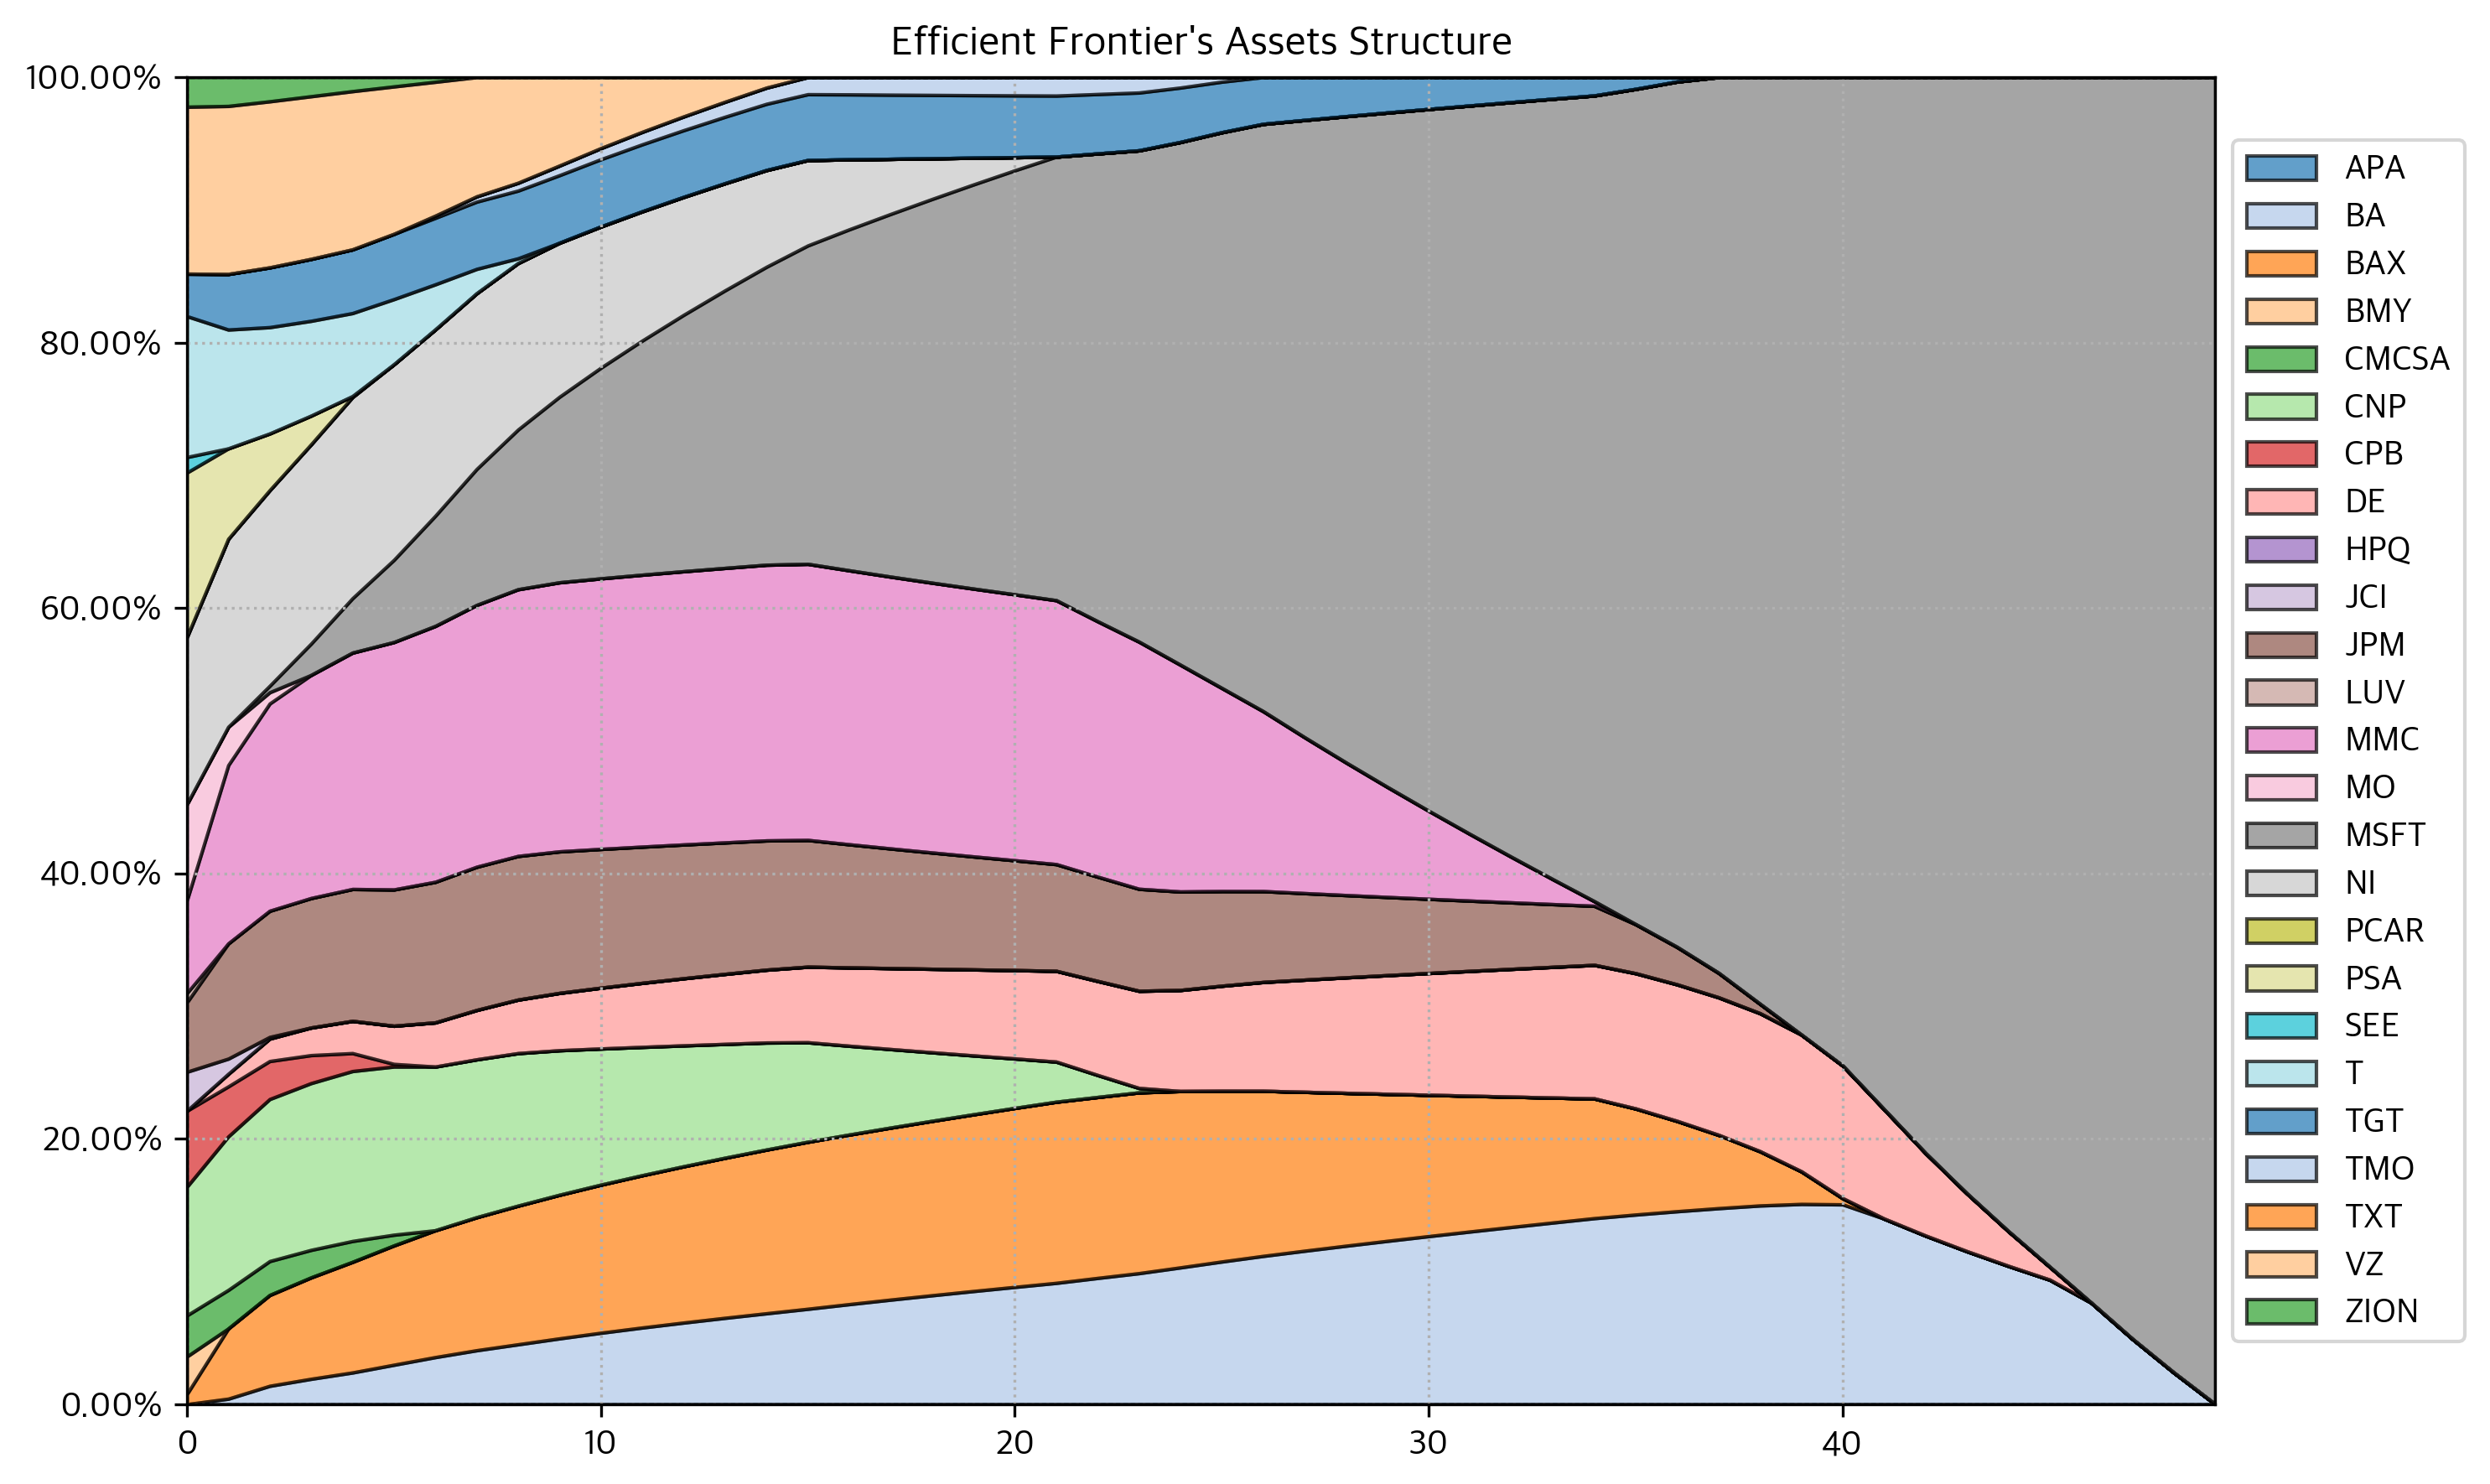

In [9]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Portfolios Using Risk Factors with Other Risk Measures and PCR

이 부분에서는 PCR(Principal Components Regression)을 기반으로 한 평균 추정치를 사용하여 여러 리스크 측정 방법에 따른 최적의 포트폴리오를 계산할 것입니다. 사용 가능한 모든 리스크 측정 방법에 대해 리스크 조정 수익률을 최대화하는 포트폴리오를 찾을 것입니다.

### 3.1 Calculate Optimal Portfolios for Several Risk Measures.

In [10]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [11]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,5.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,11.06%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,10.45%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,4.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

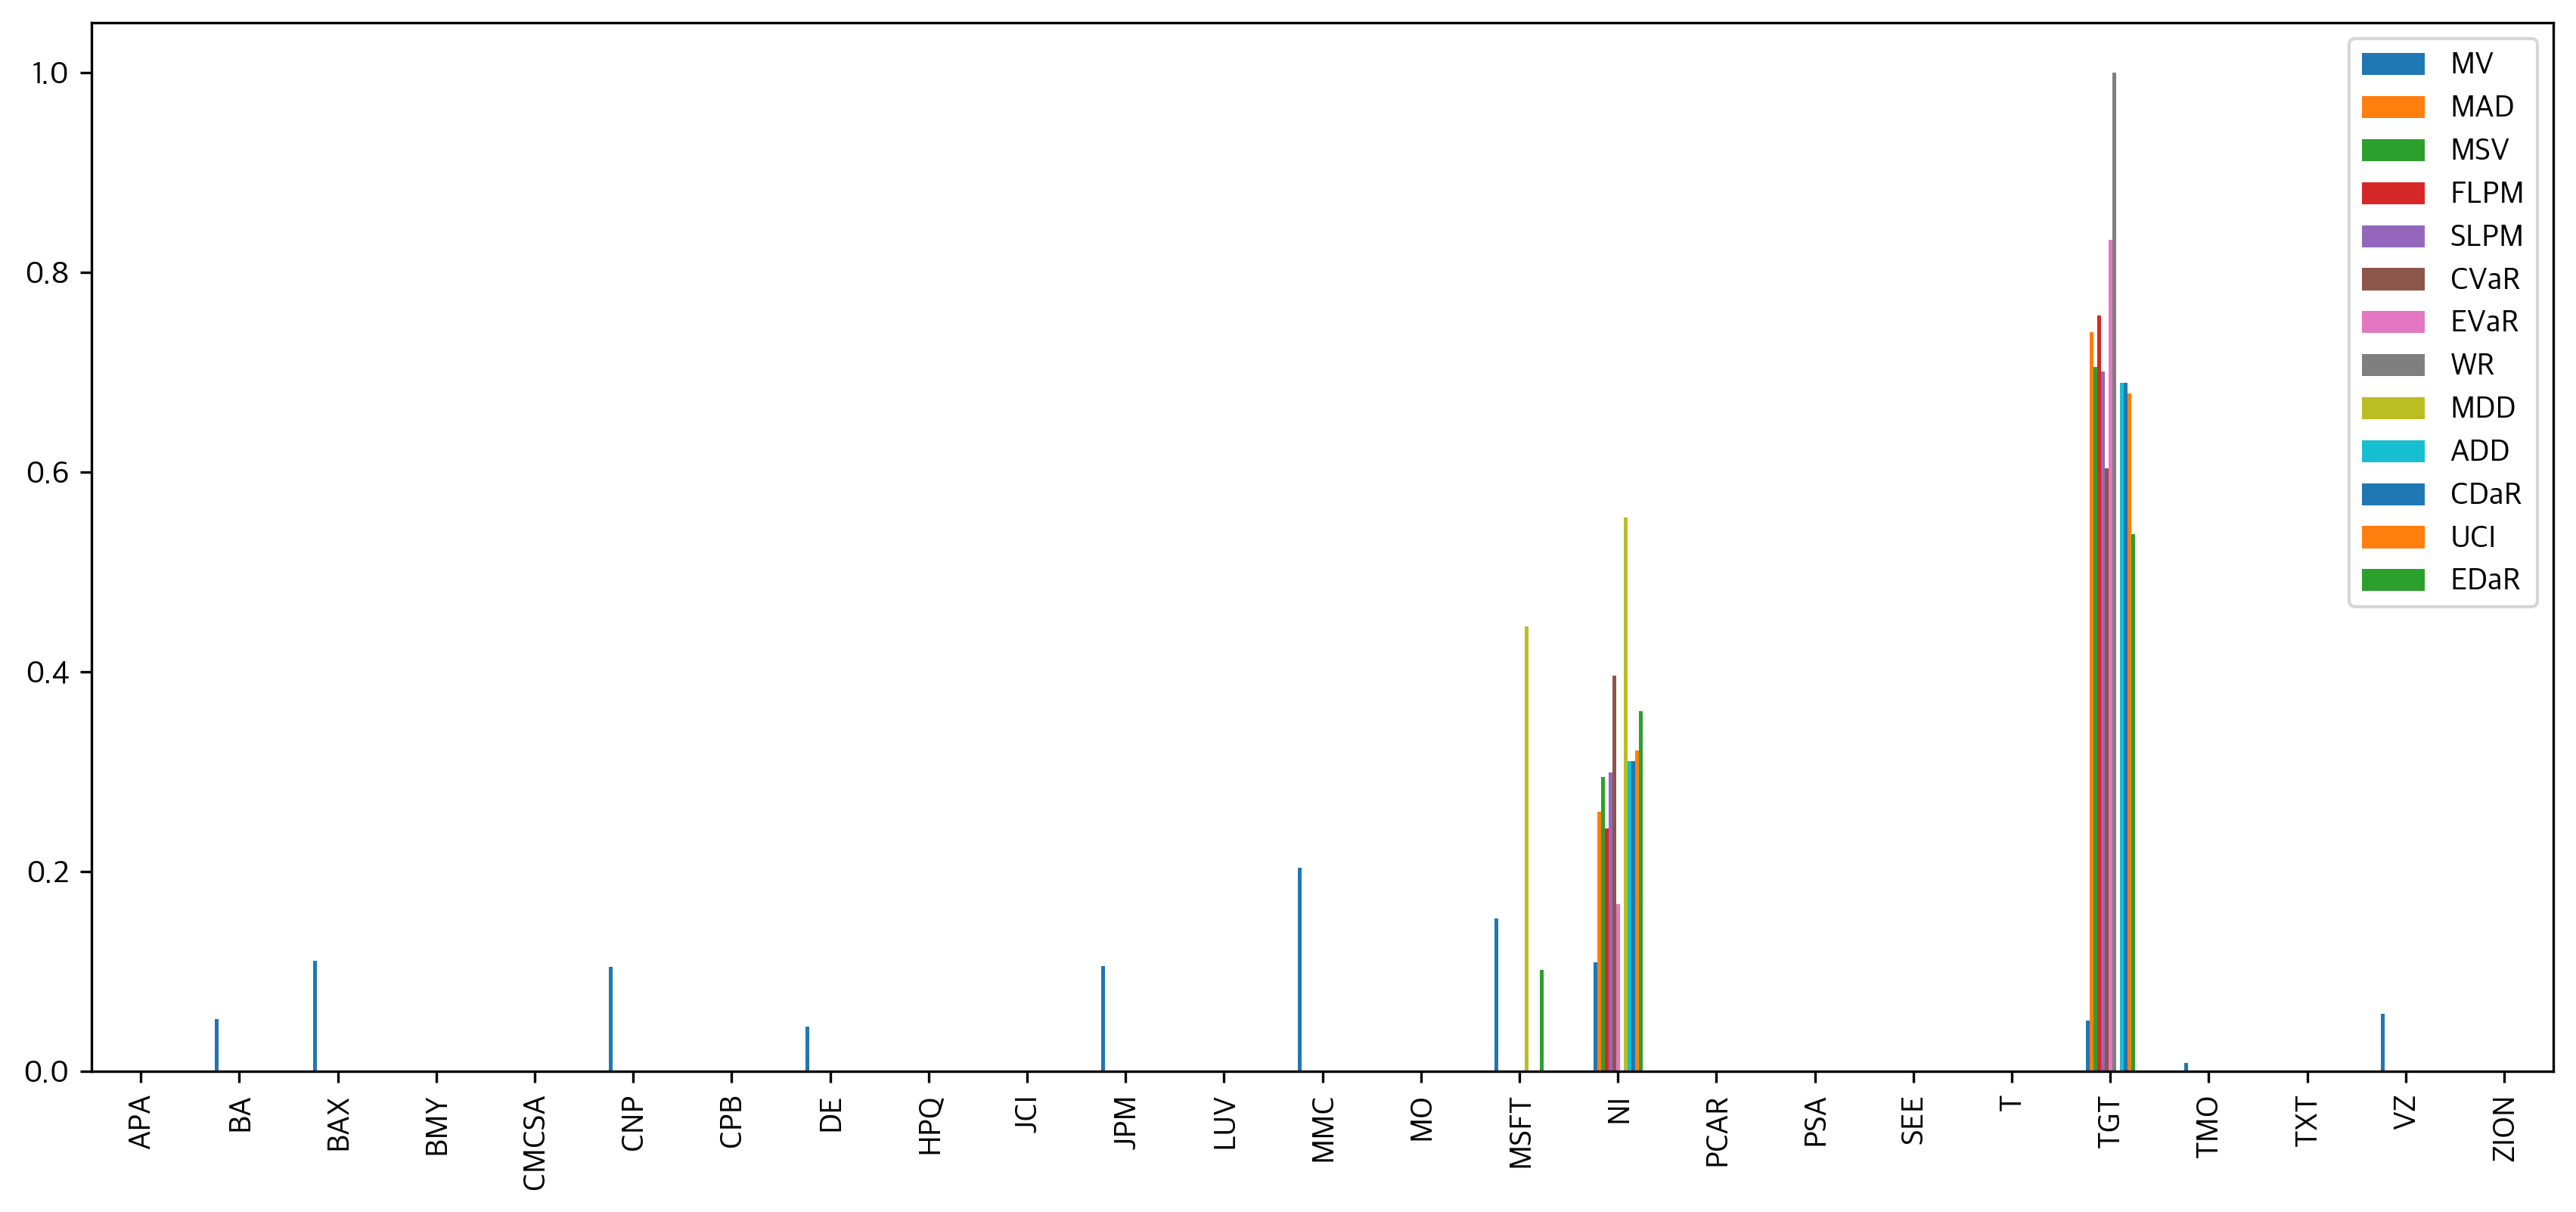

In [12]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [13]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
# based on risk factor model: R = a + B * F

hist = True

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [14]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.16%,7.63%,4.38%,6.11%,3.98%,0.00%,1.58%,0.00%,1.20%,6.79%,2.82%,6.34%,0.00%
BAX,11.50%,9.23%,10.37%,9.04%,10.62%,12.35%,4.66%,0.00%,0.00%,4.48%,0.00%,4.34%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.48%,7.21%,9.15%,5.96%,9.38%,7.49%,30.11%,28.96%,56.01%,13.49%,32.93%,18.16%,42.77%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.37%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.82%,2.73%,1.18%,2.33%,0.90%,5.14%,0.00%,0.00%,13.08%,1.49%,0.82%,1.01%,2.98%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

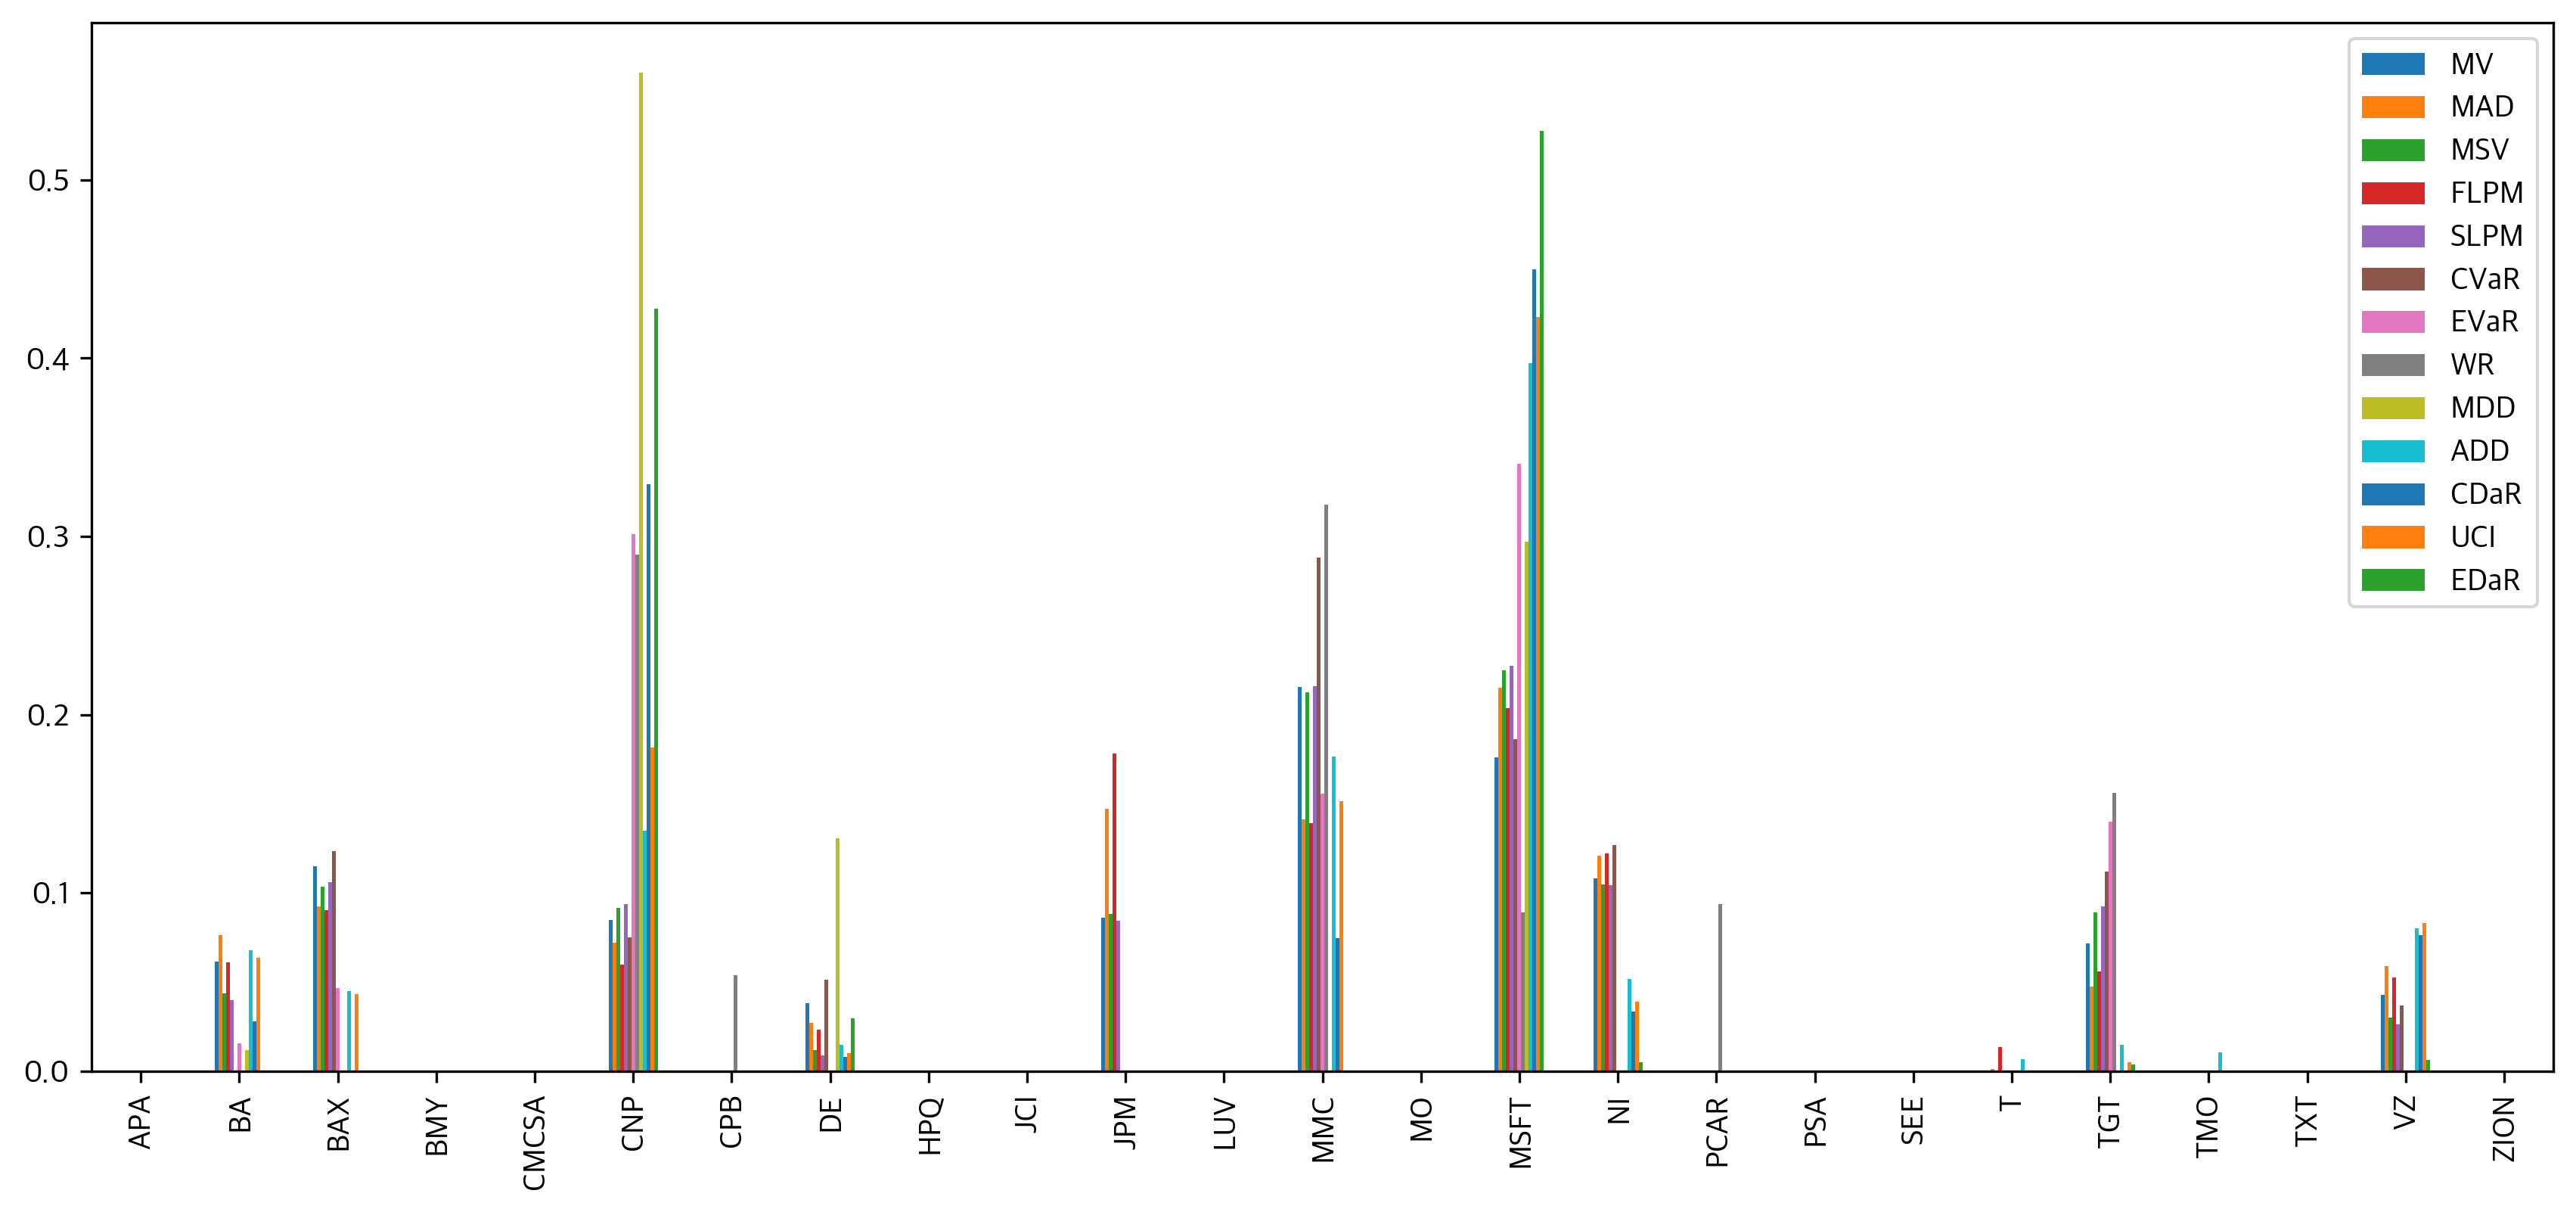

In [15]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)